In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

from  sklearn.decomposition import  PCA
from sklearn import preprocessing
from sklearn import tree
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline 

In [2]:
train_df = pd.read_csv('C:/Users/bayan/Downloads/train.csv/train.csv')
train_df.shape

(7352, 563)

In [3]:
train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

In [4]:
labels = train_df['Activity'].map({'WALKING':1,'WALKING_UPSTAIRS':2,'WALKING_DOWNSTAIRS':3,'SITTING':4,'STANDING':5,'LAYING':6})

In [5]:
train_df['labels'] = labels

In [6]:
train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

In [7]:
train_df.isnull().values.any()

False

In [8]:
print(train_df.isnull().sum())
print("\nTotal # of null values in Dataset:",train_df.isnull().sum().sum())

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
labels                  0
Length: 564, dtype: int64

Total # of null values in Dataset: 0


In [9]:
train_df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

### Data Provided by each User - Count

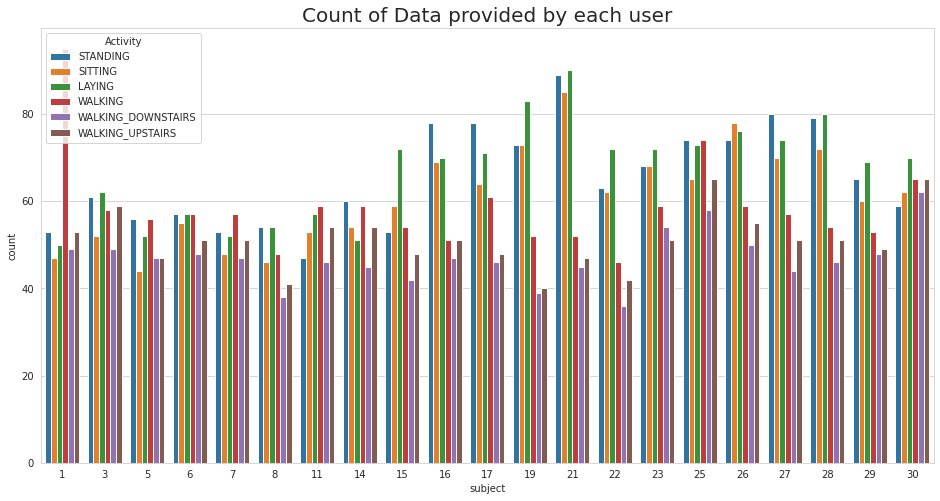

In [40]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'
plt.figure(figsize=(16,8))
plt.title('Count of Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = train_df)
plt.show()

In [41]:
acc = 0
gyro = 0
other = 0 

for i in train_df.columns:
    if('Acc' in i):
        acc += 1
    elif('Gyro' in i):
        gyro += 1
    else:
        other += 1

### Sensor Information Count

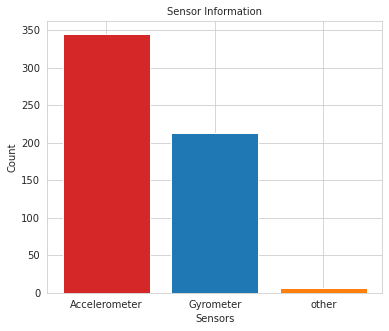

In [42]:
x = ['Accelerometer', 'Gyrometer', 'other']
y = [acc, gyro, other]
plt.figure(figsize = (6,5))
plt.bar(x, y, color=['tab:red', 'tab:blue', 'tab:orange'])
plt.title('Sensor Information', fontsize = 10)
plt.xlabel('Sensors')
plt.ylabel('Count')
plt.show()

In [13]:
test_df = pd.read_csv('C:/Users/bayan/Downloads/test.csv/test.csv')

labels_test = test_df['Activity'].map({'WALKING':1,'WALKING_UPSTAIRS':2,'WALKING_DOWNSTAIRS':3,'SITTING':4,'STANDING':5,'LAYING':6})
test_df['labels'] = labels_test
test_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

In [14]:
print(test_df.isnull().values.any())
print()
print(train_df.isnull().sum())
print("\nTotal # of null values in Dataset:",train_df.isnull().sum().sum())

False

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
labels                  0
Length: 564, dtype: int64

Total # of null values in Dataset: 0


In [15]:
print("Size of train data: ", train_df.shape)
print("Size of test data: ", test_df.shape)

Size of train data:  (7352, 564)
Size of test data:  (2947, 564)


### Activity Count

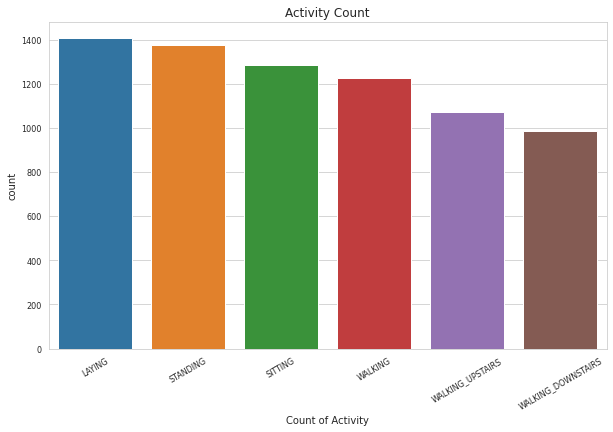

In [16]:
plt.figure(figsize = (10,6))
plt.title('Activity Count')
sns.countplot(x = 'Activity', 
              data = train_df,
              order = train_df['Activity'].value_counts().index)
plt.tick_params(labelsize = 8)
plt.xlabel('Count of Activity')
plt.xticks(rotation = 30)
plt.show()

In [17]:
columns = train_df.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train_df.columns = columns
test_df.columns = columns

test_df.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'labels'],
      dtype='object', length=564)

In [18]:
train_df.to_csv('C:/Users/bayan/Downloads/f_train.csv', index=False)
test_df.to_csv('C:/Users/bayan/Downloads/f_test.csv', index=False)

#### Activity Motion Statistics

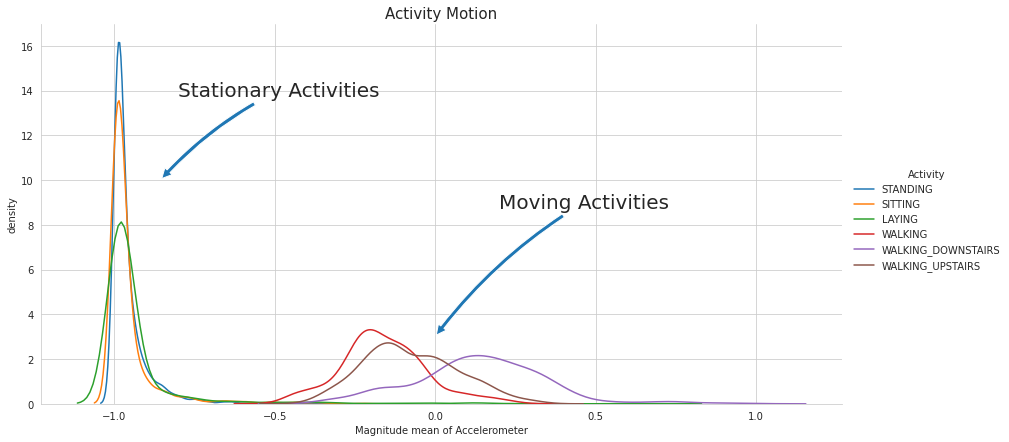

In [19]:
facetgrid = sns.FacetGrid(train_df, hue='Activity', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.856,10), xytext=(-0.8, 14), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.title('Activity Motion', fontsize=15)
plt.xlabel("Magnitude mean of Accelerometer", size=10)
plt.ylabel('density', size=10)
plt.show()

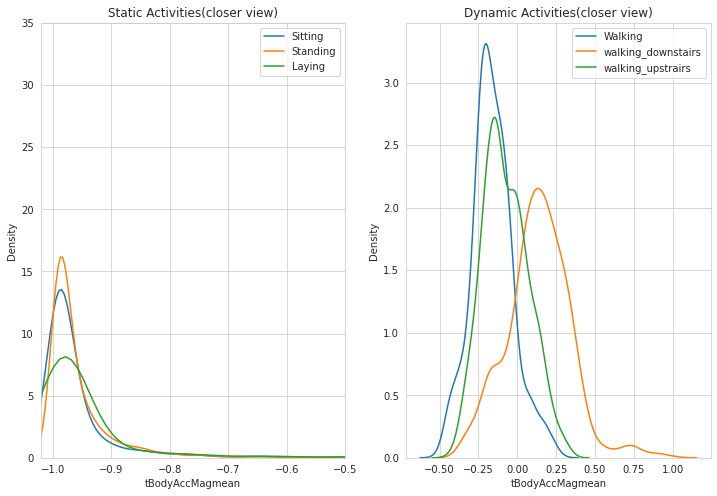

In [20]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train_df[train_df['Activity']==1]
df2 = train_df[train_df['Activity']==2]
df3 = train_df[train_df['Activity']==3]
df4 = train_df[train_df['Activity']==4]
df5 = train_df[train_df['Activity']==5]
df6 = train_df[train_df['Activity']==6]



plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static Activities(closer view)")
sns.distplot(train_df[train_df["Activity"]=="SITTING"]['tBodyAccMagmean'],hist = False, label = 'Sitting')
sns.distplot(train_df[train_df["Activity"]=="STANDING"]['tBodyAccMagmean'],hist = False,label = 'Standing')
sns.distplot(train_df[train_df["Activity"]=="LAYING"]['tBodyAccMagmean'],hist = False, label = 'Laying')
plt.legend()
plt.axis([-1.02, -0.5, 0, 35])
plt.subplot(1,2,2)
plt.title("Dynamic Activities(closer view)")
sns.distplot(train_df[train_df["Activity"]=="WALKING"]['tBodyAccMagmean'],hist = False, label = 'Walking')
sns.distplot(train_df[train_df["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMagmean'],hist = False,label = 'walking_downstairs')
sns.distplot(train_df[train_df["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMagmean'],hist = False, label = 'walking_upstrairs')
plt.legend()

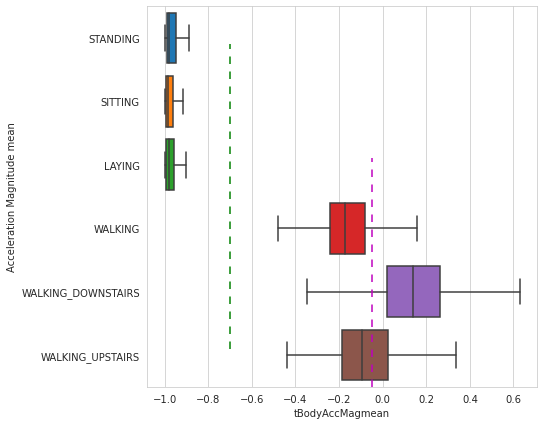

In [21]:
plt.figure(figsize=(7,7))
sns.boxplot(x='tBodyAccMagmean', y='Activity',data=train_df, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axvline(x=-0.7, ymin=0.1, ymax=0.9,dashes=(5,5), c='g')
plt.axvline(x=-0.05, ymin=0.0,ymax=0.6, dashes=(5,5), c='m')
plt.xticks()
plt.show()

#### OBSERVATIONS:

- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

#### Position of GravityAccelerationComponants also matters

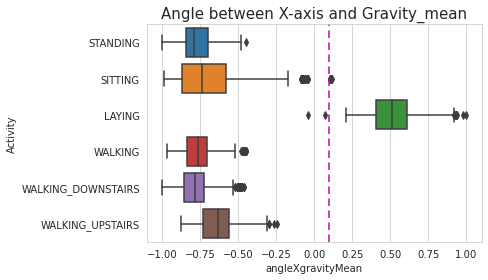

In [22]:
sns.boxplot(x='angleXgravityMean', y='Activity', data=train_df)
plt.axvline(x=0.1, ymin=0.0, ymax=1,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks()
plt.show()

#### OBSERVATIONS:

* If angleX,gravityMean > 0 then Activity is Laying.
* We can classify all datapoints belonging to Laying activity with just a single if else statement.

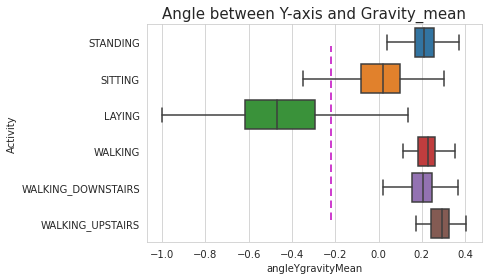

In [23]:
sns.boxplot(x='angleYgravityMean', y='Activity', data = train_df, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks()
plt.axvline(x=-0.22, ymin=0.1, ymax=0.9, dashes=(5,3), c='m')
plt.show()

In [24]:
train_features = train_df.drop(["Activity", "subject"], axis=1)
test_features = test_df.drop(["Activity", "subject"], axis=1)

train_labels = train_df["Activity"].replace(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'],  [0, 1, 2, 3, 4, 5])
test_labels = test_df["Activity"].replace(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'],  [0, 1, 2, 3, 4, 5])

print(train_features.shape)
print(test_features.shape)

print(train_labels.shape)
print(test_labels.shape)

(7352, 562)
(2947, 562)
(7352,)
(2947,)


In [25]:
columns = train_df.columns
print(columns.shape)
columns

(564,)


Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'labels'],
      dtype='object', length=564)

In [26]:
mean_X = []
mean_Y = []
mean_Z = []
for i in columns:
    if "mean" in i:
        if "X" in i:
            mean_X.append(i)
        elif "Y" in i:
            mean_Y.append(i)
        elif "Z" in i:
            mean_Z.append(i)
        
print(mean_X)
print(mean_Y)
print(mean_Z)

['tBodyAccmeanX', 'tGravityAccmeanX', 'tBodyAccJerkmeanX', 'tBodyGyromeanX', 'tBodyGyroJerkmeanX', 'fBodyAccmeanX', 'fBodyAccmeanFreqX', 'fBodyAccJerkmeanX', 'fBodyAccJerkmeanFreqX', 'fBodyGyromeanX', 'fBodyGyromeanFreqX']
['tBodyAccmeanY', 'tGravityAccmeanY', 'tBodyAccJerkmeanY', 'tBodyGyromeanY', 'tBodyGyroJerkmeanY', 'fBodyAccmeanY', 'fBodyAccmeanFreqY', 'fBodyAccJerkmeanY', 'fBodyAccJerkmeanFreqY', 'fBodyGyromeanY', 'fBodyGyromeanFreqY']
['tBodyAccmeanZ', 'tGravityAccmeanZ', 'tBodyAccJerkmeanZ', 'tBodyGyromeanZ', 'tBodyGyroJerkmeanZ', 'fBodyAccmeanZ', 'fBodyAccmeanFreqZ', 'fBodyAccJerkmeanZ', 'fBodyAccJerkmeanFreqZ', 'fBodyGyromeanZ', 'fBodyGyromeanFreqZ']


In [27]:
min_X = []
min_Y = []
min_Z = []

for i in columns:
    if "min" in i:
        if "X" in i:
            min_X.append(i)
        elif "Y" in i:
            min_Y.append(i)
        elif "Z" in i:
            min_Z.append(i)
        
print(min_X)
print(min_Y)
print(min_Z)

['tBodyAccminX', 'tGravityAccminX', 'tBodyAccJerkminX', 'tBodyGyrominX', 'tBodyGyroJerkminX', 'fBodyAccminX', 'fBodyAccJerkminX', 'fBodyGyrominX']
['tBodyAccminY', 'tGravityAccminY', 'tBodyAccJerkminY', 'tBodyGyrominY', 'tBodyGyroJerkminY', 'fBodyAccminY', 'fBodyAccJerkminY', 'fBodyGyrominY']
['tBodyAccminZ', 'tGravityAccminZ', 'tBodyAccJerkminZ', 'tBodyGyrominZ', 'tBodyGyroJerkminZ', 'fBodyAccminZ', 'fBodyAccJerkminZ', 'fBodyGyrominZ']


In [28]:
train_df.isna().sum()

tBodyAccmeanX        0
tBodyAccmeanY        0
tBodyAccmeanZ        0
tBodyAccstdX         0
tBodyAccstdY         0
                    ..
angleYgravityMean    0
angleZgravityMean    0
subject              0
Activity             0
labels               0
Length: 564, dtype: int64

In [29]:
train_df.isna()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,tBodyAccmaxY,tBodyAccmaxZ,tBodyAccminX,tBodyAccminY,tBodyAccminZ,tBodyAccsma,tBodyAccenergyX,tBodyAccenergyY,tBodyAccenergyZ,tBodyAcciqrX,tBodyAcciqrY,tBodyAcciqrZ,tBodyAccentropyX,tBodyAccentropyY,tBodyAccentropyZ,tBodyAccarCoeffX1,tBodyAccarCoeffX2,tBodyAccarCoeffX3,tBodyAccarCoeffX4,tBodyAccarCoeffY1,tBodyAccarCoeffY2,tBodyAccarCoeffY3,tBodyAccarCoeffY4,tBodyAccarCoeffZ1,tBodyAccarCoeffZ2,tBodyAccarCoeffZ3,tBodyAccarCoeffZ4,tBodyAcccorrelationXY,tBodyAcccorrelationXZ,tBodyAcccorrelationYZ,tGravityAccmeanX,tGravityAccmeanY,tGravityAccmeanZ,tGravityAccstdX,tGravityAccstdY,tGravityAccstdZ,tGravityAccmadX,tGravityAccmadY,tGravityAccmadZ,tGravityAccmaxX,tGravityAccmaxY,tGravityAccmaxZ,tGravityAccminX,tGravityAccminY,tGravityAccminZ,tGravityAccsma,tGravityAccenergyX,tGravityAccenergyY,tGravityAccenergyZ,tGravityAcciqrX,tGravityAcciqrY,tGravityAcciqrZ,tGravityAccentropyX,tGravityAccentropyY,tGravityAccentropyZ,tGravityAccarCoeffX1,tGravityAccarCoeffX2,tGravityAccarCoeffX3,tGravityAccarCoeffX4,tGravityAccarCoeffY1,tGravityAccarCoeffY2,tGravityAccarCoeffY3,tGravityAccarCoeffY4,tGravityAccarCoeffZ1,tGravityAccarCoeffZ2,tGravityAccarCoeffZ3,tGravityAccarCoeffZ4,tGravityAcccorrelationXY,tGravityAcccorrelationXZ,tGravityAcccorrelationYZ,tBodyAccJerkmeanX,tBodyAccJerkmeanY,tBodyAccJerkmeanZ,tBodyAccJerkstdX,tBodyAccJerkstdY,tBodyAccJerkstdZ,tBodyAccJerkmadX,tBodyAccJerkmadY,tBodyAccJerkmadZ,tBodyAccJerkmaxX,tBodyAccJerkmaxY,tBodyAccJerkmaxZ,tBodyAccJerkminX,tBodyAccJerkminY,tBodyAccJerkminZ,tBodyAccJerksma,tBodyAccJerkenergyX,tBodyAccJerkenergyY,tBodyAccJerkenergyZ,tBodyAccJerkiqrX,tBodyAccJerkiqrY,tBodyAccJerkiqrZ,tBodyAccJerkentropyX,tBodyAccJerkentropyY,tBodyAccJerkentropyZ,tBodyAccJerkarCoeffX1,tBodyAccJerkarCoeffX2,tBodyAccJerkarCoeffX3,tBodyAccJerkarCoeffX4,tBodyAccJerkarCoeffY1,tBodyAccJerkarCoeffY2,tBodyAccJerkarCoeffY3,tBodyAccJerkarCoeffY4,tBodyAccJerkarCoeffZ1,tBodyAccJerkarCoeffZ2,tBodyAccJerkarCoeffZ3,tBodyAccJerkarCoeffZ4,tBodyAccJerkcorrelationXY,tBodyAccJerkcorrelationXZ,tBodyAccJerkcorrelationYZ,tBodyGyromeanX,tBodyGyromeanY,tBodyGyromeanZ,tBodyGyrostdX,tBodyGyrostdY,tBodyGyrostdZ,tBodyGyromadX,tBodyGyromadY,tBodyGyromadZ,tBodyGyromaxX,tBodyGyromaxY,tBodyGyromaxZ,tBodyGyrominX,tBodyGyrominY,tBodyGyrominZ,tBodyGyrosma,tBodyGyroenergyX,tBodyGyroenergyY,tBodyGyroenergyZ,tBodyGyroiqrX,tBodyGyroiqrY,tBodyGyroiqrZ,tBodyGyroentropyX,tBodyGyroentropyY,tBodyGyroentropyZ,tBodyGyroarCoeffX1,tBodyGyroarCoeffX2,tBodyGyroarCoeffX3,tBodyGyroarCoeffX4,tBodyGyroarCoeffY1,tBodyGyroarCoeffY2,tBodyGyroarCoeffY3,tBodyGyroarCoeffY4,tBodyGyroarCoeffZ1,tBodyGyroarCoeffZ2,tBodyGyroarCoeffZ3,tBodyGyroarCoeffZ4,tBodyGyrocorrelationXY,tBodyGyrocorrelationXZ,tBodyGyrocorrelationYZ,tBodyGyroJerkmeanX,tBodyGyroJerkmeanY,tBodyGyroJerkmeanZ,tBodyGyroJerkstdX,tBodyGyroJerkstdY,tBodyGyroJerkstdZ,tBodyGyroJerkmadX,tBodyGyroJerkmadY,tBodyGyroJerkmadZ,tBodyGyroJerkmaxX,tBodyGyroJerkmaxY,tBodyGyroJerkmaxZ,tBodyGyroJerkminX,tBodyGyroJerkminY,tBodyGyroJerkminZ,tBodyGyroJerksma,tBodyGyroJerkenergyX,tBodyGyroJerkenergyY,tBodyGyroJerkenergyZ,tBodyGyroJerkiqrX,tBodyGyroJerkiqrY,tBodyGyroJerkiqrZ,tBodyGyroJerkentropyX,tBodyGyroJerkentropyY,tBodyGyroJerkentropyZ,tBodyGyroJerkarCoeffX1,tBodyGyroJerkarCoeffX2,tBodyGyroJerkarCoeffX3,tBodyGyroJerkarCoeffX4,tBodyGyroJerkarCoeffY1,tBodyGyroJerkarCoeffY2,tBodyGyroJerkarCoeffY3,tBodyGyroJerkarCoeffY4,tBodyGyroJerkarCoeffZ1,tBodyGyroJerkarCoeffZ2,tBodyGyroJerkarCoeffZ3,tBodyGyroJerkarCoeffZ4,tBodyGyroJerkcorrelationXY,tBodyGyroJerkcorrelationXZ,tBodyGyroJerkcorrelationYZ,tBodyAccMagmean,tBodyAccMagstd,tBodyAccMagmad,tBodyAccMagmax,tBodyAccMagmin,tBodyAccMagsma,tBodyAccMagenergy,tBodyAccMagiqr,tBodyAccMagentropy,tBodyAccMagarCoeff1,tBodyAccMagarCoeff2,tBodyAccMagarCoeff3,tBodyAccMagarCoeff4,tGravityAccMagmean,tGravityAccMagstd,tGravityAccMagmad,tGravityAccMagmax,tGravityAccMagmin,tGravityAccMags

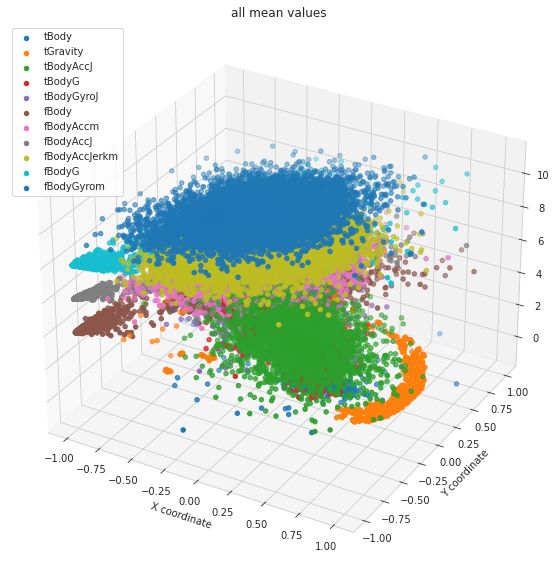

In [30]:
fig = plt.figure(figsize=(10, 10))
axs = plt.axes(projection="3d")

for i in range(len(mean_X)):
    axs.scatter(train_df[mean_X[i]].values, train_df[mean_Y[i]].values, train_df[mean_Z[i]].values+i, label=mean_X[i][0:-8])

plt.title("all mean values")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.legend(loc="upper left")
plt.show()

In [31]:
np.unique(train_df["Activity"])

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

[Text(0, 0, 'LAYING'),
 Text(1, 0, 'SITTING'),
 Text(2, 0, 'STANDING'),
 Text(3, 0, 'WALKING'),
 Text(4, 0, 'WALKING_DOWNSTAIRS'),
 Text(5, 0, 'WALKING_UPSTAIRS')]

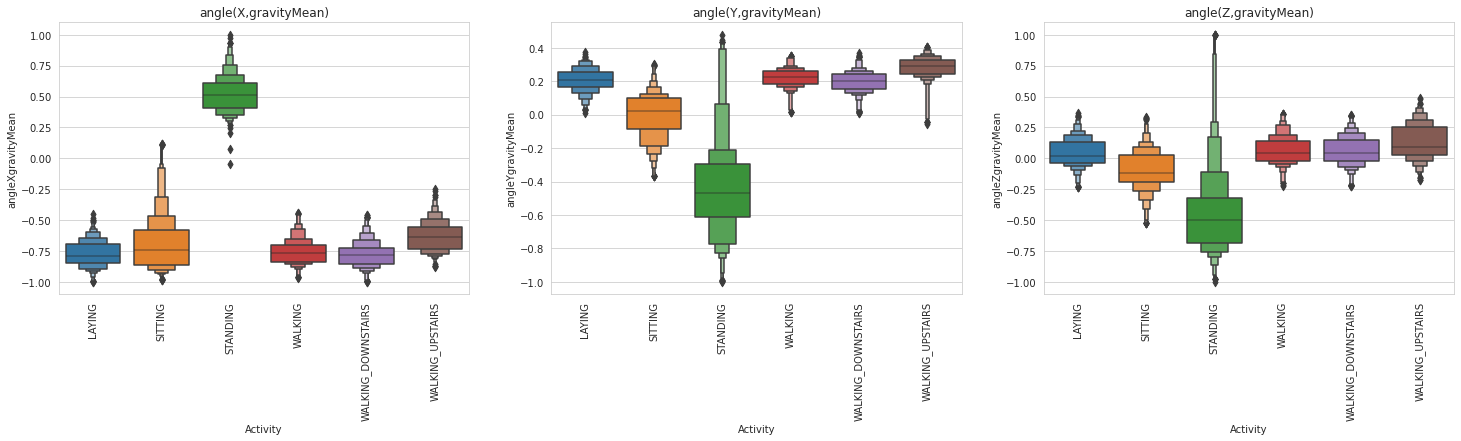

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(25, 5))
sns.boxenplot(ax = axs[0], x="Activity", y="angleXgravityMean", data=train_df)
sns.boxenplot(ax = axs[1], x="Activity", y="angleYgravityMean", data=train_df)
sns.boxenplot(ax = axs[2], x="Activity", y="angleZgravityMean", data=train_df)

axs[0].set_title("angle(X,gravityMean)")
axs[0].set_xticklabels(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], rotation="vertical")

axs[1].set_title("angle(Y,gravityMean)")
axs[1].set_xticklabels(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], rotation="vertical")

axs[2].set_title("angle(Z,gravityMean)")
axs[2].set_xticklabels(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], rotation="vertical")

In [33]:
min_X = []
min_Y = []
min_Z = []

mean_X = []
mean_Y = []
mean_Z = []

max_X = []
max_Y = []
max_Z = []

for i in columns:
    if "min" in i:
        if "X" in i:
            min_X.append(i)
            mean_X.append(i.replace("min", "mean"))
            max_X.append(i.replace("min", "max"))
        elif "Y" in i:
            min_Y.append(i)
            mean_Y.append(i.replace("min", "mean"))
            max_Y.append(i.replace("min", "max"))
        elif "Z" in i:
            min_Z.append(i)
            mean_Z.append(i.replace("min", "mean"))
            max_Z.append(i.replace("min", "max"))

        
print(min_X)
print(min_Y)
print(min_Z, "\n")

print(mean_X)
print(mean_Y)
print(mean_Z, "\n")

print(max_X)
print(max_Y)
print(max_Z, "\n")

['tBodyAccminX', 'tGravityAccminX', 'tBodyAccJerkminX', 'tBodyGyrominX', 'tBodyGyroJerkminX', 'fBodyAccminX', 'fBodyAccJerkminX', 'fBodyGyrominX']
['tBodyAccminY', 'tGravityAccminY', 'tBodyAccJerkminY', 'tBodyGyrominY', 'tBodyGyroJerkminY', 'fBodyAccminY', 'fBodyAccJerkminY', 'fBodyGyrominY']
['tBodyAccminZ', 'tGravityAccminZ', 'tBodyAccJerkminZ', 'tBodyGyrominZ', 'tBodyGyroJerkminZ', 'fBodyAccminZ', 'fBodyAccJerkminZ', 'fBodyGyrominZ'] 

['tBodyAccmeanX', 'tGravityAccmeanX', 'tBodyAccJerkmeanX', 'tBodyGyromeanX', 'tBodyGyroJerkmeanX', 'fBodyAccmeanX', 'fBodyAccJerkmeanX', 'fBodyGyromeanX']
['tBodyAccmeanY', 'tGravityAccmeanY', 'tBodyAccJerkmeanY', 'tBodyGyromeanY', 'tBodyGyroJerkmeanY', 'fBodyAccmeanY', 'fBodyAccJerkmeanY', 'fBodyGyromeanY']
['tBodyAccmeanZ', 'tGravityAccmeanZ', 'tBodyAccJerkmeanZ', 'tBodyGyromeanZ', 'tBodyGyroJerkmeanZ', 'fBodyAccmeanZ', 'fBodyAccJerkmeanZ', 'fBodyGyromeanZ'] 

['tBodyAccmaxX', 'tGravityAccmaxX', 'tBodyAccJerkmaxX', 'tBodyGyromaxX', 'tBodyGyroJerkmax

### Difference of features of X coordinates in Accelerometer and Gyroscorpe

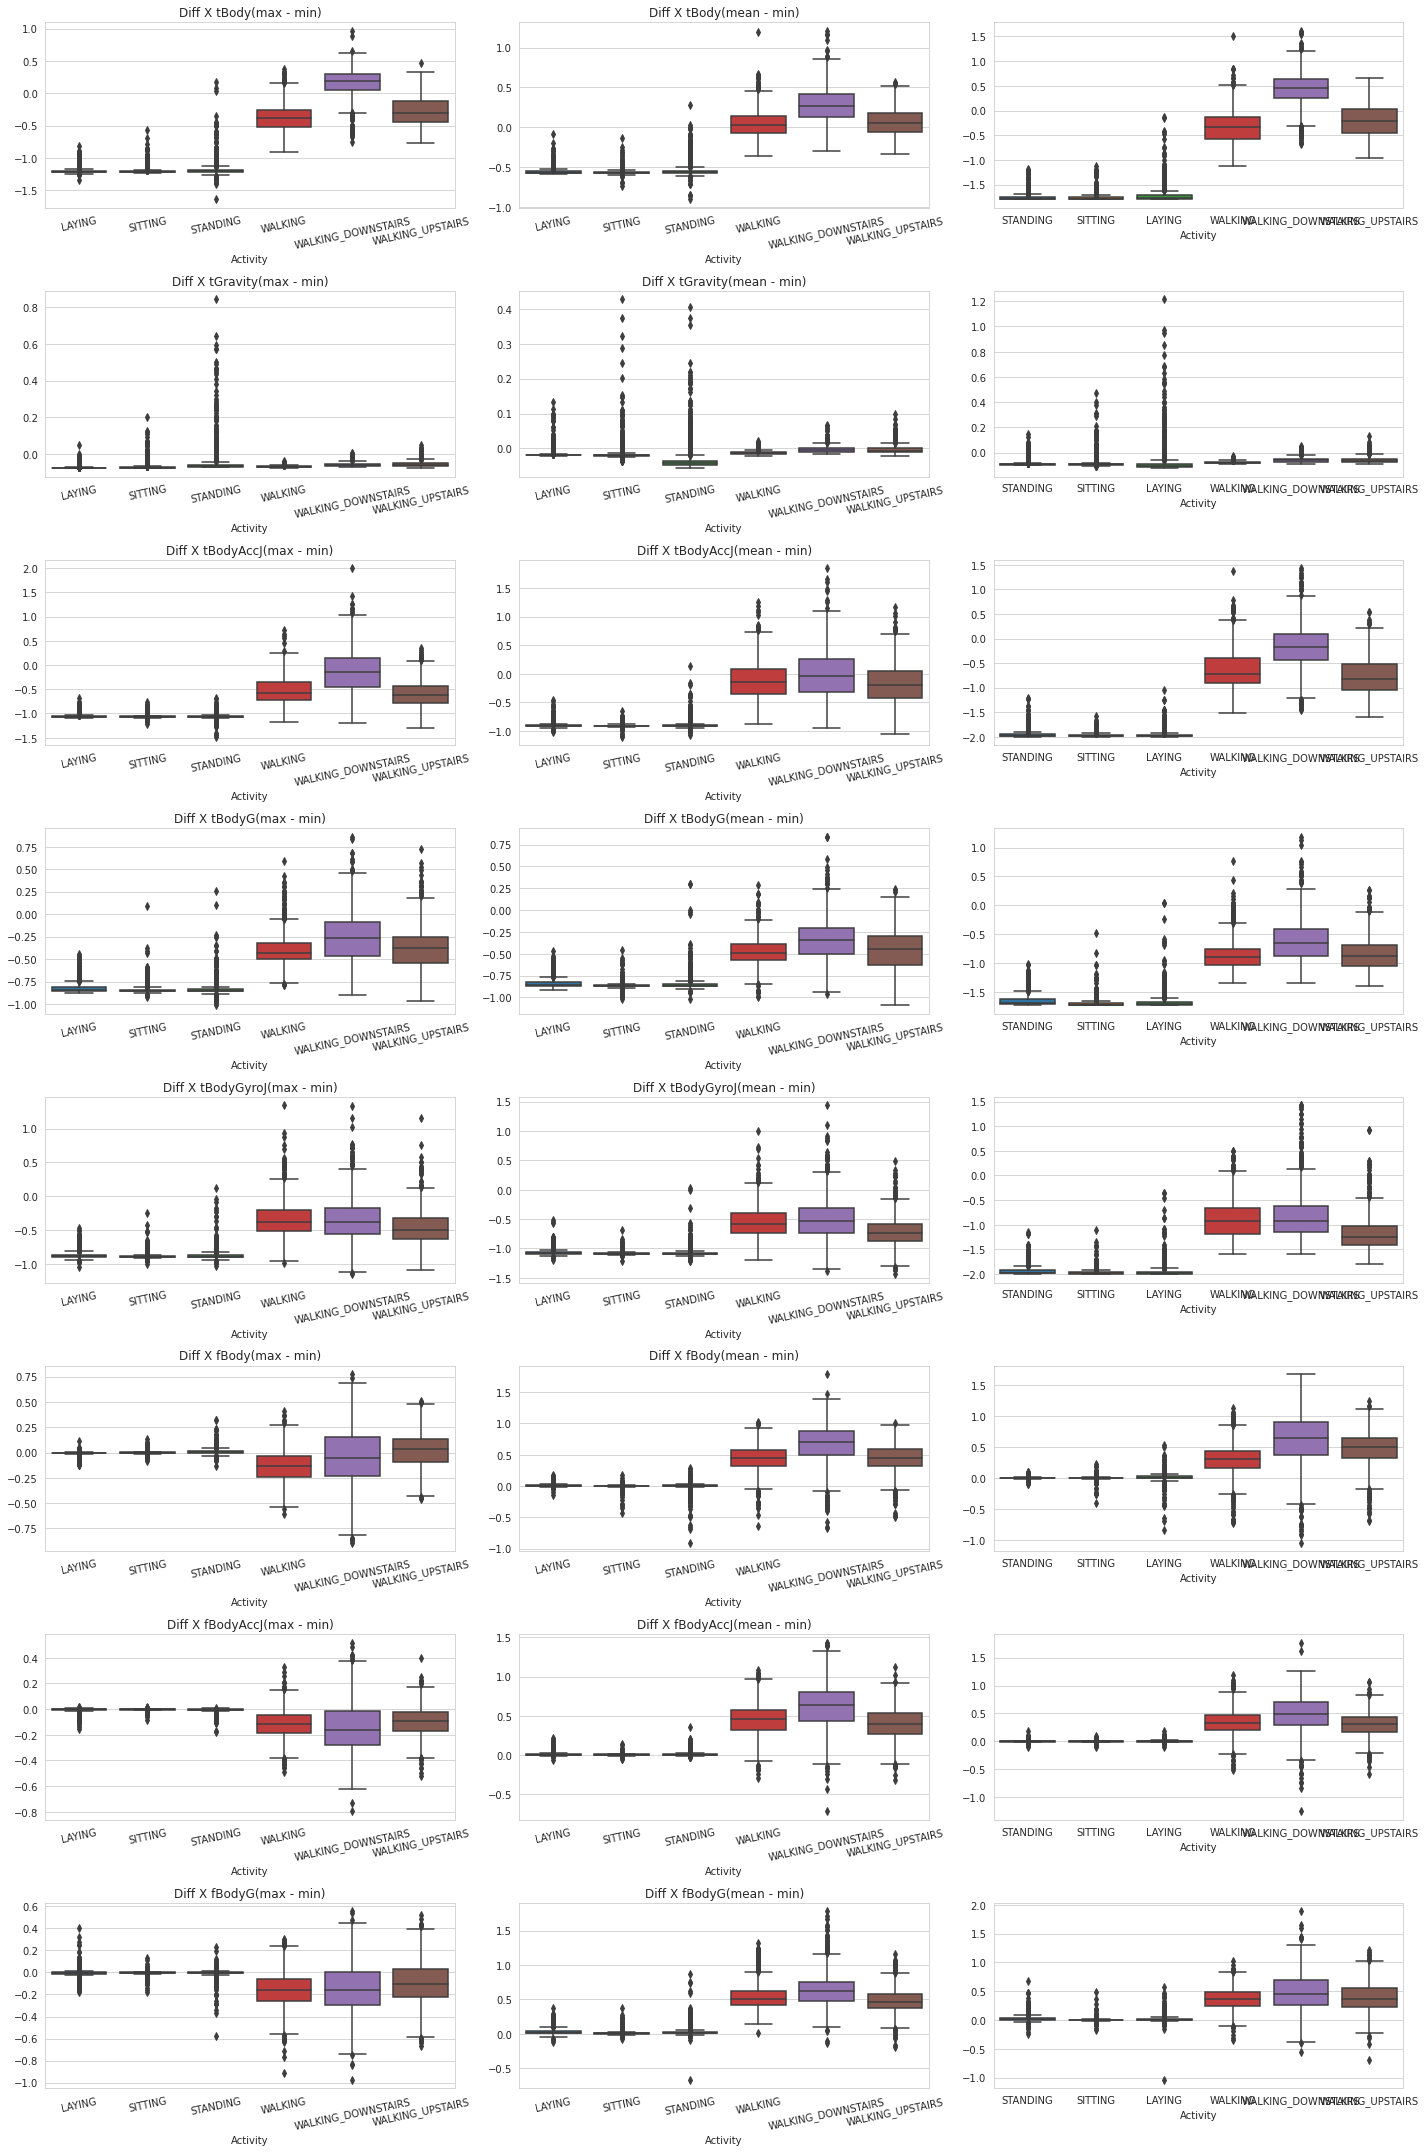

In [34]:
fig, axs = plt.subplots(len(min_X), 3, figsize=(20, 30))

for i in range(len(min_X)):
    mean_min_X = train_df[mean_X[i]] - train_df[min_X[i]]
    max_mean_X = train_df[max_X[i]] - train_df[mean_X[i]]
    max_min_X = train_df[max_X[i]] - train_df[min_X[i]]
    
    sns.boxplot(ax=axs[i, 0], x=train_df["Activity"], y=max_mean_X)
    sns.boxplot(ax=axs[i, 1], x=train_df["Activity"], y=mean_min_X)
    sns.boxplot(ax=axs[i, 2], x=train_df["Activity"], y=max_min_X)
    
    axs[i, 0].set_title("Diff X "+mean_X[i][0:-8]+"(max - mean)")
    axs[i, 0].set_xticklabels(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
           'WALKING_UPSTAIRS'], rotation=12)

    axs[i, 1].set_title("Diff X "+mean_X[i][0:-8]+"(mean - min)")
    axs[i, 1].set_xticklabels(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
           'WALKING_UPSTAIRS'], rotation=12)
    
    axs[i, 0].set_title("Diff X "+mean_X[i][0:-8]+"(max - min)")
    axs[i, 0].set_xticklabels(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
           'WALKING_UPSTAIRS'], rotation=12)
    
plt.tight_layout()

### Difference of features of Y coordinates in Accelerometer and Gyroscorpe

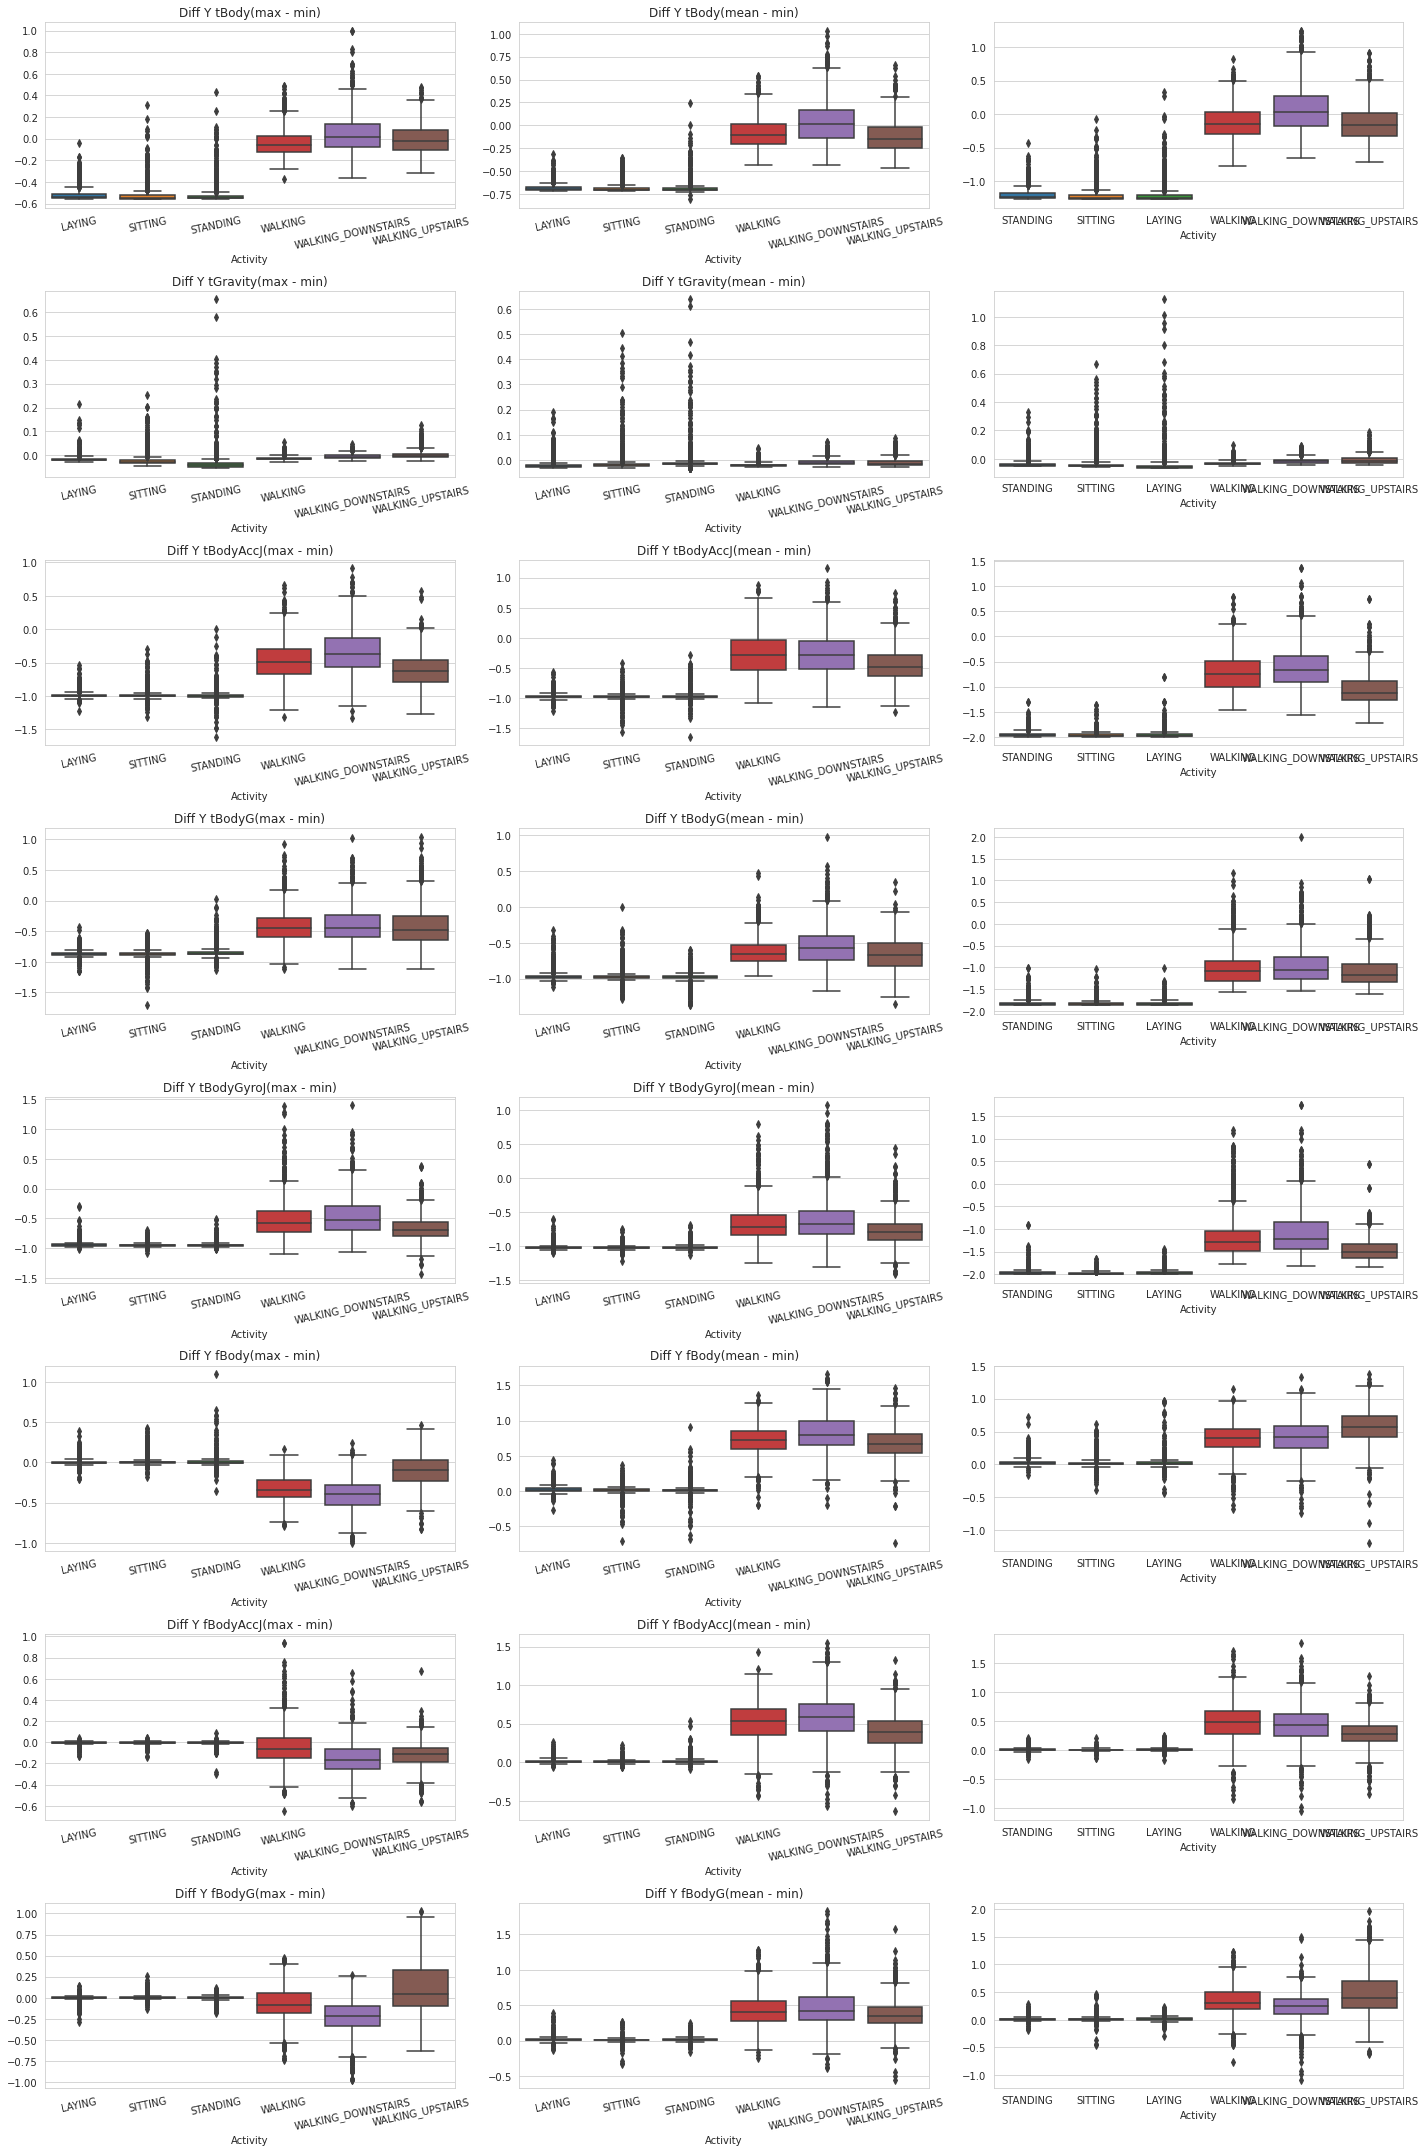

In [35]:
fig, axs = plt.subplots(len(min_X), 3, figsize=(20, 30))

for i in range(len(min_X)):
    
    mean_min_Y = train_df[mean_Y[i]] - train_df[min_Y[i]]
    max_mean_Y = train_df[max_Y[i]] - train_df[mean_Y[i]]
    max_min_Y = train_df[max_Y[i]] - train_df[min_Y[i]]
    
    sns.boxplot(ax=axs[i, 0], x=train_df["Activity"], y=max_mean_Y)
    sns.boxplot(ax=axs[i, 1], x=train_df["Activity"], y=mean_min_Y)
    sns.boxplot(ax=axs[i, 2], x=train_df["Activity"], y=max_min_Y)
    
    axs[i, 0].set_title("Diff Y "+mean_X[i][0:-8]+"(max - mean)")
    axs[i, 0].set_xticklabels(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
           'WALKING_UPSTAIRS'], rotation=12)

    axs[i, 1].set_title("Diff Y "+mean_X[i][0:-8]+"(mean - min)")
    axs[i, 1].set_xticklabels(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
           'WALKING_UPSTAIRS'], rotation=12)
    
    axs[i, 0].set_title("Diff Y "+mean_X[i][0:-8]+"(max - min)")
    axs[i, 0].set_xticklabels(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
           'WALKING_UPSTAIRS'], rotation=12)
    
plt.tight_layout()

### Difference of features of Z coordinates in Accelerometer and Gyroscorpe

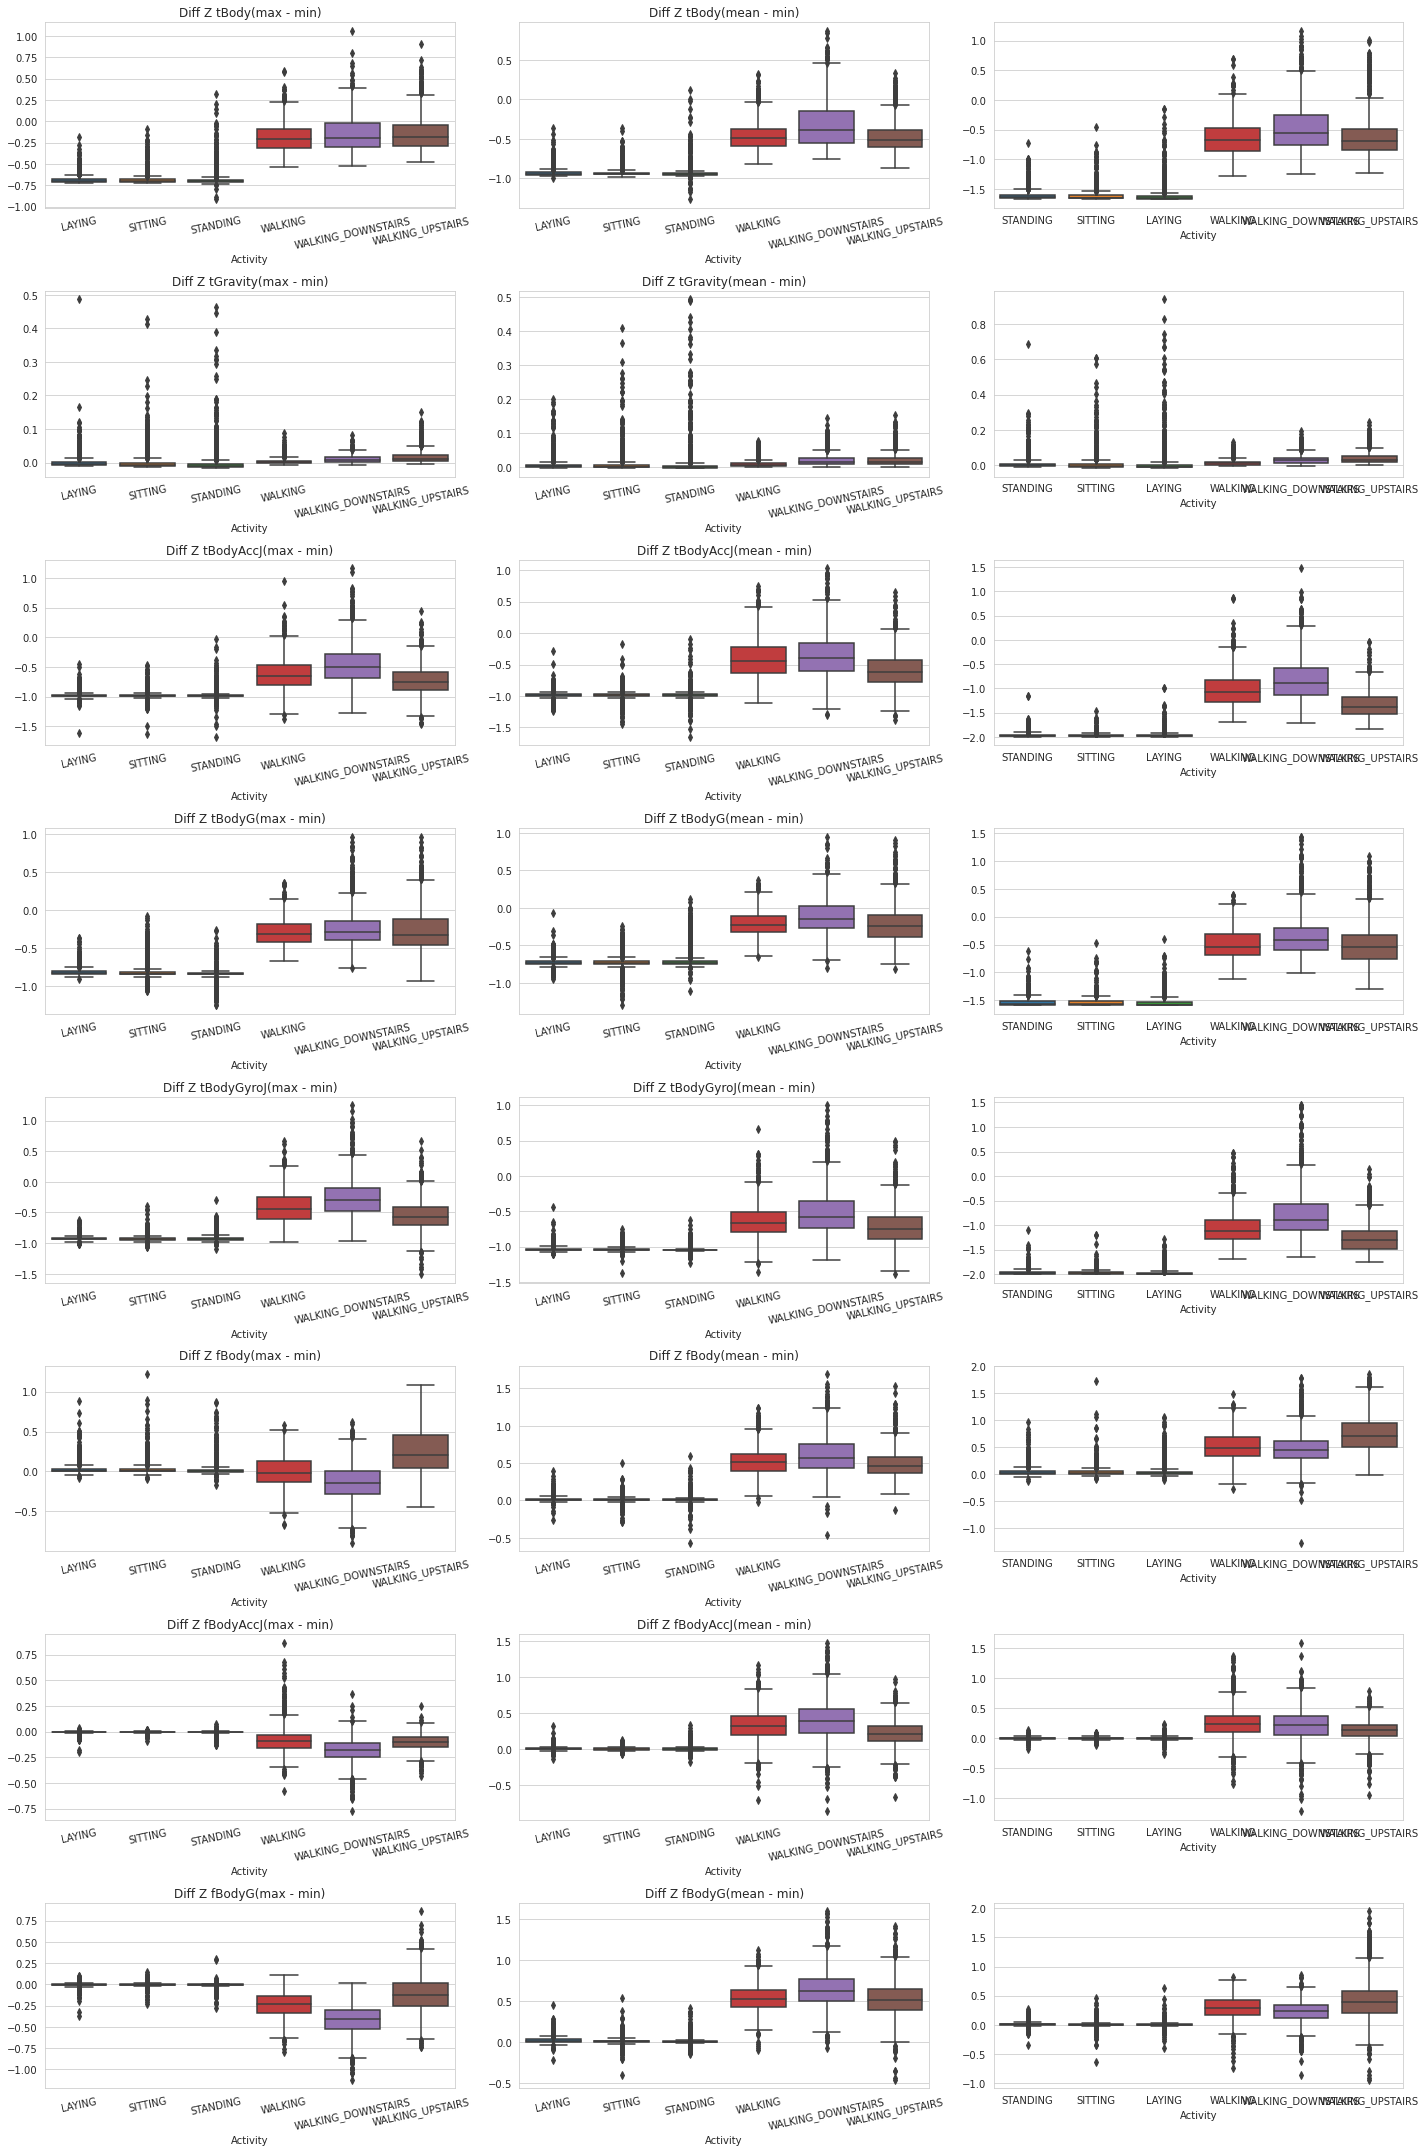

In [36]:
fig, axs = plt.subplots(len(min_X), 3, figsize=(20, 30))

for i in range(len(min_X)):
    
    mean_min_Z = train_df[mean_Z[i]] - train_df[min_Z[i]]
    max_mean_Z = train_df[max_Z[i]] - train_df[mean_Z[i]]
    max_min_Z = train_df[max_Z[i]] - train_df[min_Z[i]]
    
    sns.boxplot(ax=axs[i, 0], x=train_df["Activity"], y=max_mean_Z)
    sns.boxplot(ax=axs[i, 1], x=train_df["Activity"], y=mean_min_Z)
    sns.boxplot(ax=axs[i, 2], x=train_df["Activity"], y=max_min_Z)
    
    axs[i, 0].set_title("Diff Z "+mean_X[i][0:-8]+"(max - mean)")
    axs[i, 0].set_xticklabels(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
           'WALKING_UPSTAIRS'], rotation=12)

    axs[i, 1].set_title("Diff Z "+mean_X[i][0:-8]+"(mean - min)")
    axs[i, 1].set_xticklabels(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
           'WALKING_UPSTAIRS'], rotation=12)
    
    axs[i, 0].set_title("Diff Z "+mean_X[i][0:-8]+"(max - min)")
    axs[i, 0].set_xticklabels(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
           'WALKING_UPSTAIRS'], rotation=12)
    
plt.tight_layout()

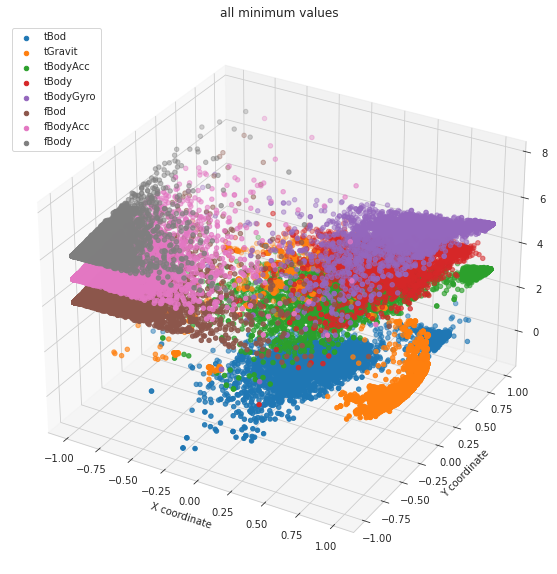

In [37]:
fig = plt.figure(figsize=(10, 10))
axs = plt.axes(projection="3d")

for i in range(len(min_X)):
    axs.scatter(train_df[min_X[i]].values, train_df[min_Y[i]].values, train_df[min_Y[i]].values+i, label=min_X[i][0:-8])

plt.title("all minimum values")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.legend(loc="upper left")
plt.show()

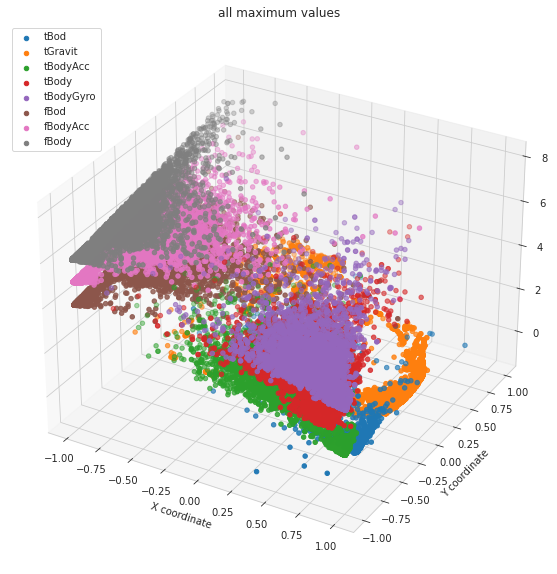

In [38]:
fig = plt.figure(figsize=(10, 10))
axs = plt.axes(projection="3d")

for i in range(len(max_X)):
    axs.scatter(train_df[min_X[i]].values, train_df[max_Y[i]].values, train_df[max_Y[i]].values+i, label=max_X[i][0:-8])

plt.title("all maximum values")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.legend(loc="upper left")
plt.show()